<a href="https://colab.research.google.com/github/biswa-13/DataScience/blob/master/DS3_ANN_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# In this section we will try to predict the probability of a passenger alive or not using the titanic dataset 
# here we have applied all the steps for data cleaning and preprocessing and finally used the tensorflow model for our prediction_rslt

# references:
# dataset : https://github.com/biswa-13/DataScience/blob/master/datasets/titanic_dataset.csv

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import Sequential, Model


In [ ]:
dataset3 = pd.read_csv("sample_data/titanic_dataset.csv")

In [ ]:
# dataset3.head()
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


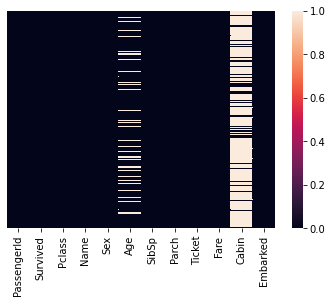

In [ ]:
sbn.heatmap(dataset3.isnull(), yticklabels=False)

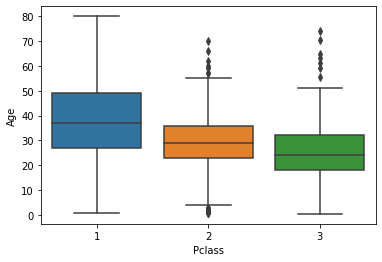

In [ ]:
sbn.boxplot(x="Pclass", y = "Age", data=dataset3)

In [ ]:
def impute_age_wrt_pclass(cols):
  age = cols["Age"]
  clas = cols["Pclass"]
  if(pd.isnull(age)):
    if(clas == 1):
      return 37
    elif(clas == 2):
      return 28
    elif(clas == 3):
      return 26
    else:
      return 26
  else:
    return age
print("Finish: defining the imputation method()")

Finish: defining the imputation method()


In [ ]:
dataset3["Age"] = dataset3[["Age","Pclass"]].apply(impute_age_wrt_pclass, axis =1)
print("Finish: performing the imputation on the missing values of the Age")
dataset3.info()

Finish: performing the imputation on the missing values of the Age
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


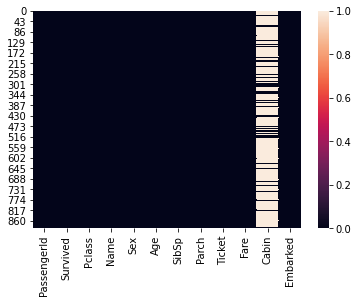

In [ ]:
# finding for "NA" values and removing the rows
sbn.heatmap(dataset3.isna())
dataset3.drop(["Cabin"], inplace=True, axis=1)
dataset3.dropna(inplace=True)
dataset3.info()

In [ ]:
# removing the "na" values and converting the categorical columns(Embarked, Sex) into feature columns

embarked = pd.get_dummies(dataset3["Embarked"], drop_first=True)
sex = pd.get_dummies(dataset3["Sex"], drop_first=True)
embarked.head()
sex.head()
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [ ]:
# removing the unwanted columns 
dataset3.drop(['PassengerId',"Name","Sex","Ticket","Embarked"], axis=1, inplace=True)
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 48.6 KB


In [ ]:
# concantenating the newly created columns
dataset3 = pd.concat([dataset3, embarked, sex], axis=1)
dataset3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Q         889 non-null    uint8  
 7   S         889 non-null    uint8  
 8   male      889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


In [ ]:
dataset3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1


In [ ]:
# preparing the training and testing dataset
train_input, test_input, train_output, test_output = train_test_split(
    dataset3.drop(["Survived"], axis=1),
    dataset3["Survived"],
    test_size = .30,
    random_state = 101
)
train_input.info()
test_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 807 to 865
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  622 non-null    int64  
 1   Age     622 non-null    float64
 2   SibSp   622 non-null    int64  
 3   Parch   622 non-null    int64  
 4   Fare    622 non-null    float64
 5   Q       622 non-null    uint8  
 6   S       622 non-null    uint8  
 7   male    622 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 31.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 511 to 634
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  267 non-null    int64  
 1   Age     267 non-null    float64
 2   SibSp   267 non-null    int64  
 3   Parch   267 non-null    int64  
 4   Fare    267 non-null    float64
 5   Q       267 non-null    uint8  
 6   S       267 non-null    uint8  
 7   male    267 non-nul

In [ ]:
# Scalling the inputs

ss = StandardScaler()
train_input = ss.fit_transform(train_input)
test_input = ss.fit_transform(test_input)
print("Finish: Scalling the inputs")

Finish: Scalling the inputs


In [ ]:
# Creating the tensorflow model for prediction
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(6, activation="relu", kernel_initializer="he_uniform", input_dim=8))
model.add(tf.keras.layers.Dense(units=6, activation="relu", kernel_initializer="he_uniform"))
# model.add(tf.keras.layers.Dense(units=3, activation="relu", kernel_initializer="he_uniform"))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid", kernel_initializer="glorot_uniform"))

print("Finish: Creating the Model layers...")

Finish: Creating the Model layers...


In [ ]:
# Compiling the model
summery = model.compile(
    optimizer = 'rmsprop',
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)
summery
print("finish: Compiling the model ...")

finish: Compiling the model ...


In [ ]:
# defining the callback function which will watch the validation loss and if it sees
# that continously for 3 times the val_accuracy does not increases then it will stopped
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


In [ ]:
# Trainging the model
history = model.fit(train_input, train_output, batch_size=32, validation_split=0.32, epochs=230, callbacks=[callback])
print("\n\n Finish: Trainging the model...")

Epoch 1/230
14/14 [==============================] - 0s 11ms/step - loss: 0.6976 - accuracy: 0.6137 - val_loss: 0.6925 - val_accuracy: 0.6550
Epoch 2/230
14/14 [==============================] - 0s 4ms/step - loss: 0.6643 - accuracy: 0.6232 - val_loss: 0.6642 - val_accuracy: 0.6900
Epoch 3/230
14/14 [==============================] - 0s 4ms/step - loss: 0.6405 - accuracy: 0.6517 - val_loss: 0.6465 - val_accuracy: 0.7000
Epoch 4/230
14/14 [==============================] - 0s 4ms/step - loss: 0.6224 - accuracy: 0.6754 - val_loss: 0.6291 - val_accuracy: 0.7100
Epoch 5/230
14/14 [==============================] - 0s 4ms/step - loss: 0.6048 - accuracy: 0.6848 - val_loss: 0.6139 - val_accuracy: 0.7300
Epoch 6/230
14/14 [==============================] - 0s 4ms/step - loss: 0.5914 - accuracy: 0.7014 - val_loss: 0.6014 - val_accuracy: 0.7350
Epoch 7/230
14/14 [==============================] - 0s 4ms/step - loss: 0.5787 - accuracy: 0.7109 - val_loss: 0.5914 - val_accuracy: 0.7350
Epoch 8/230


In [ ]:
def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("epochs")
  plt.ylabel(string)
  plt.legend(["train", "test"])
  plt.show() 

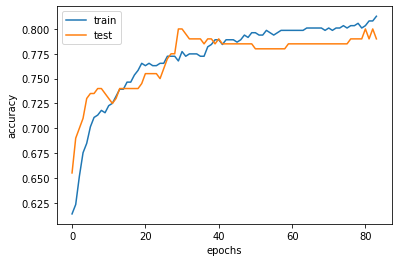

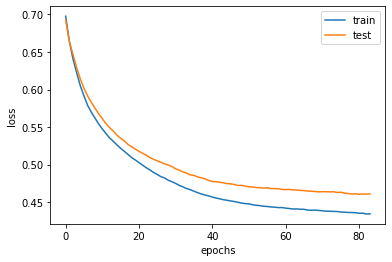

In [ ]:
plot_graph(history, "accuracy")
plot_graph(history, "loss")

In [ ]:
# Model Accuracy Prediction

prediction_rslt = model.predict(test_input)
prediction_rslt = (prediction_rslt > 0.5)

# confusion matrix
cm = confusion_matrix(test_output, prediction_rslt)
print("Confusion Matrix -->\n",cm)

accuracy = accuracy_score(test_output, prediction_rslt)
print("Model Accuracy Is: ",accuracy)

Confusion Matrix -->
 [[140  23]
 [ 30  74]]
Model Accuracy Is:  0.8014981273408239
